# With our regression model, we will predict the age of the profile owner by looking at the profile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv('profiles.csv')

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df=df.drop_duplicates()[:9514]   

In [6]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9509,28.0,athletic,strictly anything,socially,never,working on med school,just a normal guy looking for someone around m...,working hard and studying. things are always f...,"i'm excellent with oncology, numbers and algor...",my eyes change color.<br />\n<br />\ni smirk a...,"foo fighters, oasis, bloc party, doves, incubu...",my family and i all live here and i can't thin...,somewhere fun to go or something good to eat.,"studying, followed by shenanigans.","i've actually had some success on here, met so...",you've got something to say. or if there's som...,white,73.0,60000.0,medicine / health,2012-06-30-02-49,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [7]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

In [8]:
df['body_type'].value_counts()

body_type
average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: count, dtype: int64

In [9]:
df['body_type']=df['body_type'].replace(['average','skinny','athletic','thin'],'fit')
df['body_type']=df['body_type'].replace(['a little extra','full figured','rather not say'],'curvy')
df['body_type']=df['body_type'].replace(['jacked','overweight'],'used up')

In [10]:
df['body_type'].value_counts()

body_type
fit        7211
curvy      1275
used up     180
Name: count, dtype: int64

In [11]:
df['drinks'].value_counts()

drinks
socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: count, dtype: int64

In [12]:
df['drugs'].value_counts()

drugs
never        5972
sometimes    1181
often          62
Name: count, dtype: int64

In [13]:
df['religion'].value_counts()

religion
agnosticism                                   448
other                                         417
agnosticism but not too serious about it      400
agnosticism and laughing about it             386
catholicism but not too serious about it      367
atheism                                       363
atheism and laughing about it                 329
other and laughing about it                   325
christianity but not too serious about it     320
christianity                                  297
other but not too serious about it            243
judaism but not too serious about it          232
atheism but not too serious about it          200
catholicism                                   165
atheism and somewhat serious about it         138
christianity and somewhat serious about it    133
other and somewhat serious about it           122
catholicism and laughing about it             117
judaism and laughing about it                 113
agnosticism and somewhat serious about it

In [14]:
df['sign'].value_counts()

sign
leo and it&rsquo;s fun to think about            277
taurus and it&rsquo;s fun to think about         275
gemini and it&rsquo;s fun to think about         271
cancer and it&rsquo;s fun to think about         260
scorpio and it&rsquo;s fun to think about        258
libra and it&rsquo;s fun to think about          257
virgo and it&rsquo;s fun to think about          257
pisces and it&rsquo;s fun to think about         253
aries and it&rsquo;s fun to think about          252
aries but it doesn&rsquo;t matter                250
aquarius but it doesn&rsquo;t matter             250
sagittarius and it&rsquo;s fun to think about    242
leo but it doesn&rsquo;t matter                  239
virgo but it doesn&rsquo;t matter                236
aquarius and it&rsquo;s fun to think about       235
gemini but it doesn&rsquo;t matter               235
cancer but it doesn&rsquo;t matter               233
taurus but it doesn&rsquo;t matter               222
sagittarius but it doesn&rsquo;t matter  

In [15]:
df['sign'] = df['sign'].str.split().str[0]
df["religion"]=df["religion"].str.split().str[0] 

In [16]:
df['sign'].value_counts()

sign
leo            707
aries          680
cancer         677
gemini         676
aquarius       674
taurus         663
virgo          660
libra          648
scorpio        632
pisces         627
sagittarius    604
capricorn      528
Name: count, dtype: int64

In [17]:
df['smokes'].value_counts()

smokes
no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: count, dtype: int64

In [18]:
df['pets'].value_counts()

pets
likes dogs and likes cats          2314
likes dogs                         1152
has dogs                            683
likes dogs and has cats             674
has dogs and likes cats             384
likes dogs and dislikes cats        301
has dogs and has cats               226
has cats                            221
likes cats                          200
has dogs and dislikes cats           82
dislikes dogs and dislikes cats      42
dislikes dogs and likes cats         36
dislikes cats                        20
dislikes dogs and has cats           13
dislikes dogs                         4
Name: count, dtype: int64

In [19]:
df['smokes']=df['smokes'].replace(['sometimes','when drinking'],'sometimes')
df['smokes']=df['smokes'].replace(['yes','trying to quit'],'yes')
df['pets']=df['pets'].replace(['has dogs','likes dogs'],'likes dogs')
df['pets']=df['pets'].replace(['has cats','likes cats'],'likes cats')
df['pets']=df['pets'].replace(['has dogs and likes cats','has dogs and has cats','likes dogs and has cats'],'likes dogs and likes cats')
df['pets']=df['pets'].replace(['dislikes dogs and has cats','dislikes dogs and likes cats'],'dislikes dogs and likes cats')
df['pets']=df['pets'].replace(['has dogs and dislikes cats','likes dogs and dislikes cats'],'likes dogs and dislikes cats ')

In [20]:
df['smokes'].value_counts()

smokes
no           7011
sometimes    1045
yes           540
Name: count, dtype: int64

In [21]:
df['pets'].value_counts()

pets
likes dogs and likes cats          3598
likes dogs                         1835
likes cats                          421
likes dogs and dislikes cats        383
dislikes dogs and likes cats         49
dislikes dogs and dislikes cats      42
dislikes cats                        20
dislikes dogs                         4
Name: count, dtype: int64

In [22]:
df['diet'].value_counts()

diet
mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: count, dtype: int64

In [23]:
df['diet']=df['diet'].replace(['mostly anything','strictly anything'],'anything')
df['diet']=df['diet'].replace(['mostly vegetarian','strictly vegetarian'],'vegetarian')
df['diet']=df['diet'].replace(['mostly other','strictly other'],'other')
df['diet']=df['diet'].replace(['mostly vegan','strictly vegan'],'vegan')
df['diet']=df['diet'].replace(['halal','strictly kosher','strictly halal','mostly kosher','mostly halal'],'kosher')

In [24]:
df['diet'].value_counts()

diet
anything      4523
vegetarian     814
other          270
vegan          120
kosher          34
Name: count, dtype: int64

In [25]:
df['last_online'].value_counts()

last_online
2012-06-29-22-56    15
2012-06-29-22-33    11
2012-06-29-22-35    11
2012-06-29-22-58    11
2012-06-29-22-55    10
                    ..
2012-06-27-08-27     1
2011-09-12-13-24     1
2012-06-22-17-55     1
2012-04-17-11-29     1
2012-06-14-15-14     1
Name: count, Length: 6763, dtype: int64

In [26]:
df["last_online_year"]=2021-(df['last_online'].str[:4]).astype(int)
df["last_online_month"]=(df['last_online'].str[5:7]).astype(int)
df.drop('last_online',axis=1)    

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,last_online_year,last_online_month
0,22.0,curvy,anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,english,single,9,6
1,35.0,fit,other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,9,6
2,38.0,fit,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,"san francisco, california",NaN,straight,likes cats,NaN,m,pisces,no,"english, french, c++",available,9,6
3,23.0,fit,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,9,6
4,29.0,fit,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,fit,anything,socially,never,working on med school,just a normal guy looking for someone around m...,working hard and studying. things are always f...,"i'm excellent with oncology, numbers and algor...",my eyes change color.<br />\n<br />\ni smirk a...,"foo fighters, oasis, bloc party, doves, incubu...",my family and i all live here and i can't thin...,somewhere fun to go or something good to eat.,"studying, followed by shenanigans.","i've actually had some success on here, met so...",you've got something to say. or if there's som...,white,73.0,60000.0,medicine / health,"san francisco, california","doesn&rsquo;t have kids, but wants

In [27]:
df.isnull().sum()

age                     0
body_type             848
diet                 3753
drinks                502
drugs                2299
education            1055
essay0                847
essay1               1167
essay2               1465
essay3               1824
essay4               1635
essay5               1700
essay6               2162
essay7               1961
essay8               3153
essay9               1960
ethnicity             949
height                  0
income                  0
job                  1331
last_online             0
location                0
offspring            5628
orientation             0
pets                 3162
religion             3253
sex                     0
sign                 1738
smokes                918
speaks                  6
status                  0
last_online_year        0
last_online_month       0
dtype: int64

<Axes: xlabel='offspring'>

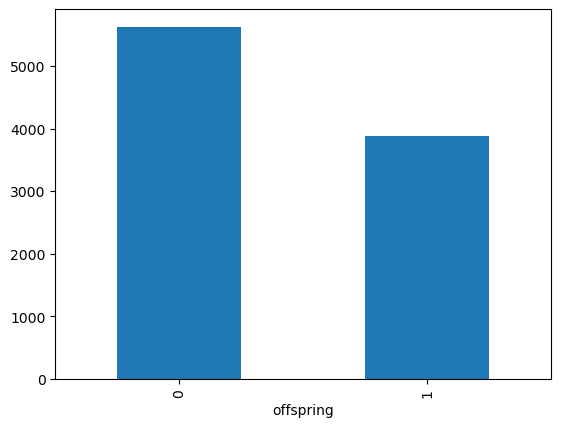

In [28]:
offsprings=[]
for i in df.offspring.fillna("Unknown").str.replace("[^\w\s]",""):
    if "doesnrsquot" in i:
        offsprings.append("0")
    elif "Unknown" in i:
        offsprings.append("0")
    else:
        offsprings.append("1")
        
df["offspring"]=offsprings
df["offspring"]=df["offspring"].astype(int)
df["offspring"].value_counts().plot.bar() 

In [29]:
df['education'].value_counts(89)

education
graduated from college/university    0.445679
graduated from masters program       0.165741
working on college/university        0.114553
working on masters program           0.029673
graduated from two-year college      0.028963
graduated from high school           0.024235
graduated from ph.d program          0.023998
graduated from law school            0.020924
working on two-year college          0.018797
working on ph.d program              0.018797
dropped out of college/university    0.017614
college/university                   0.015841
graduated from space camp            0.012295
dropped out of space camp            0.010285
working on space camp                0.008630
graduated from med school            0.008630
working on law school                0.006502
two-year college                     0.005083
working on med school                0.004847
dropped out of two-year college      0.004019
masters program                      0.002483
working on high school  

In [30]:
df['education']=df['education'].replace(['masters program','high school','space camp','ph.d program','law school',
                               'two-year college'],'college/university')

In [31]:
df['education'] = df['education'].str.split().str[0]

In [32]:
df['education'].value_counts(89)

education
graduated             0.730465
working               0.204161
dropped               0.038184
college/university    0.027190
Name: proportion, dtype: float64

In [33]:
df.isnull().sum()

age                     0
body_type             848
diet                 3753
drinks                502
drugs                2299
education            1055
essay0                847
essay1               1167
essay2               1465
essay3               1824
essay4               1635
essay5               1700
essay6               2162
essay7               1961
essay8               3153
essay9               1960
ethnicity             949
height                  0
income                  0
job                  1331
last_online             0
location                0
offspring               0
orientation             0
pets                 3162
religion             3253
sex                     0
sign                 1738
smokes                918
speaks                  6
status                  0
last_online_year        0
last_online_month       0
dtype: int64

In [34]:
for column in df.columns:
    if df[column].dtype == 'object': 
        df[column].fillna(df[column].mode()[0], inplace=True)

In [35]:
df.isnull().sum()

age                  0
body_type            0
diet                 0
drinks               0
drugs                0
education            0
essay0               0
essay1               0
essay2               0
essay3               0
essay4               0
essay5               0
essay6               0
essay7               0
essay8               0
essay9               0
ethnicity            0
height               0
income               0
job                  0
last_online          0
location             0
offspring            0
orientation          0
pets                 0
religion             0
sex                  0
sign                 0
smokes               0
speaks               0
status               0
last_online_year     0
last_online_month    0
dtype: int64

In [36]:
df=df.drop(['essay0',
       'essay1','essay2','essay3','essay4','essay5', 'essay6', 'essay7',
       'essay8', 'essay9',"ethnicity","job"],axis=1)

In [37]:
df.location=df.location.str.split(",").str[0]  

In [38]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")
df["number_of_fluent_languages"].replace(0,1,regex=True,inplace=True)
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")
df.drop("speaks",axis=1,inplace=True)   

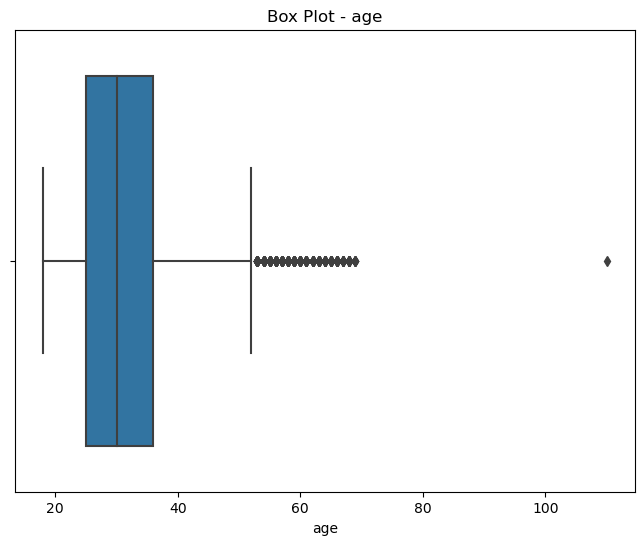

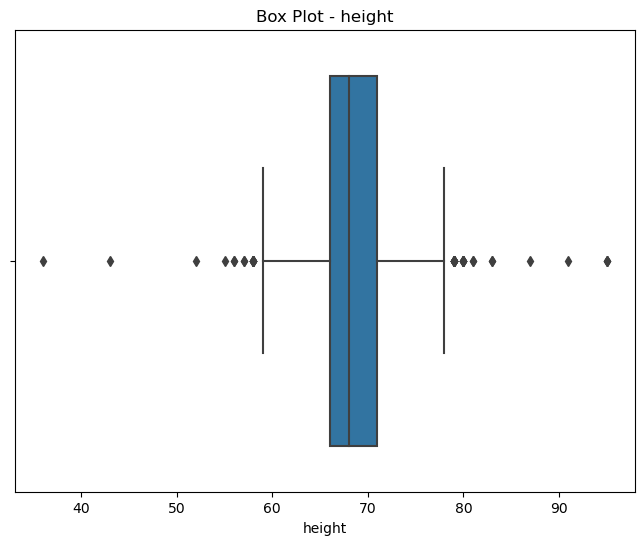

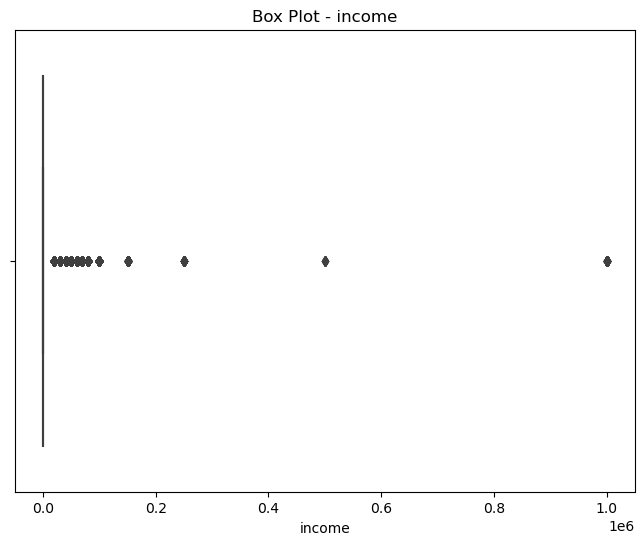

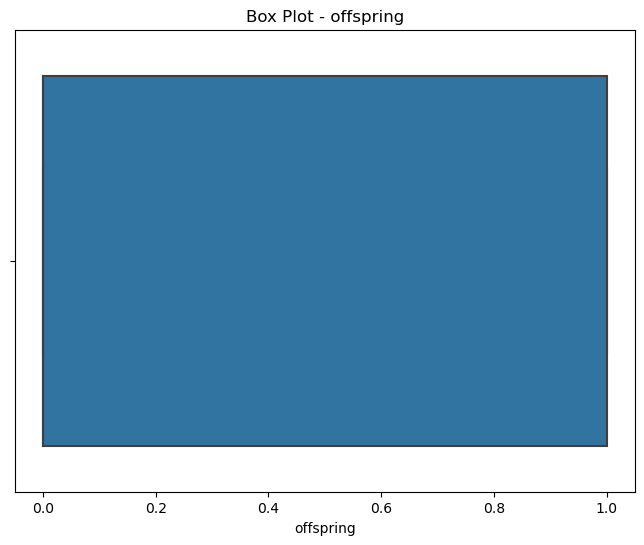

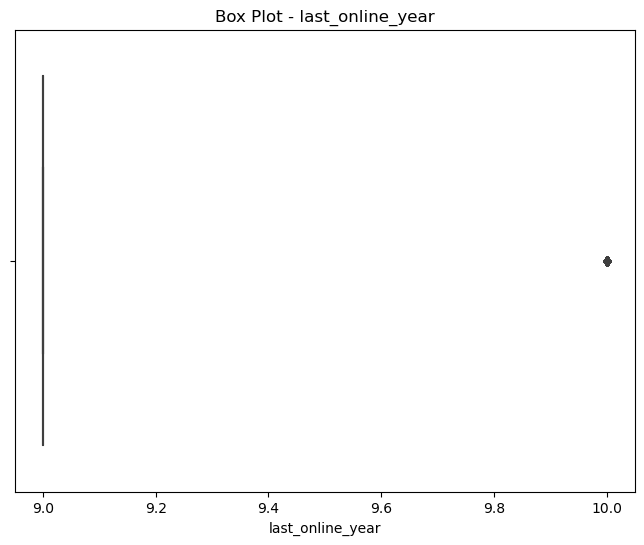

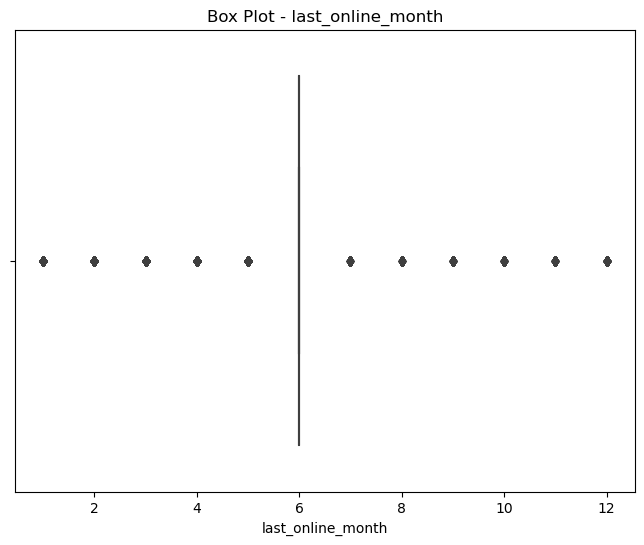

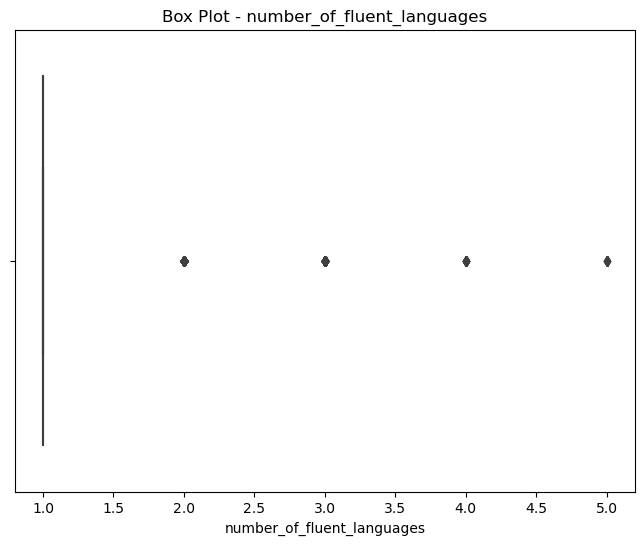

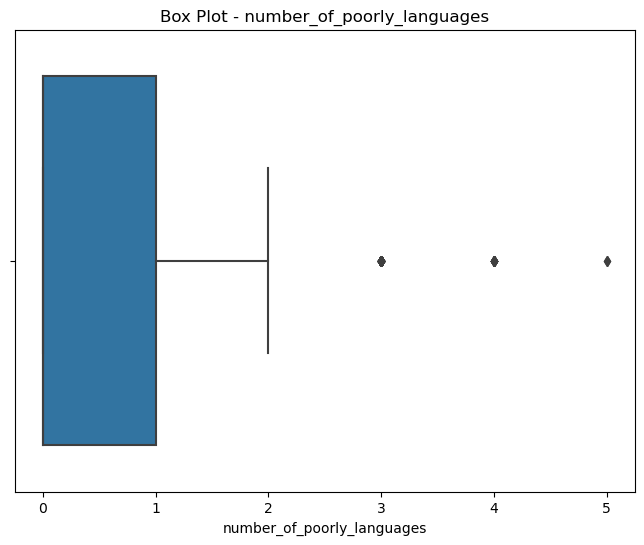

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_outliers(df):
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]:  
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Box Plot - {column}')
            plt.show()

visualize_outliers(df)

In [40]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
height                        0
income                        0
last_online                   0
location                      0
offspring                     0
orientation                   0
pets                          0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
last_online_year              0
last_online_month             0
number_of_fluent_languages    0
number_of_poorly_languages    0
dtype: int64

In [41]:
outliers = df.select_dtypes(include=[np.number]).quantile(0.97)

In [42]:
df=df[(df['last_online_year']<outliers['last_online_year'])]
df=df[(df['income']<outliers['income'])]
df=df[(df['age']<outliers['age'])]

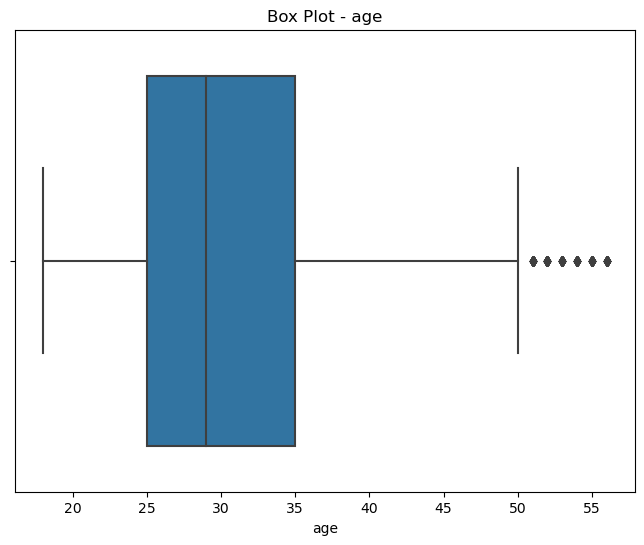

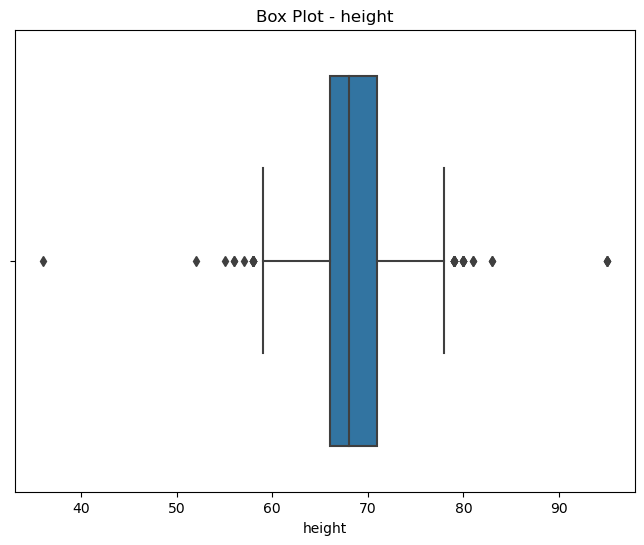

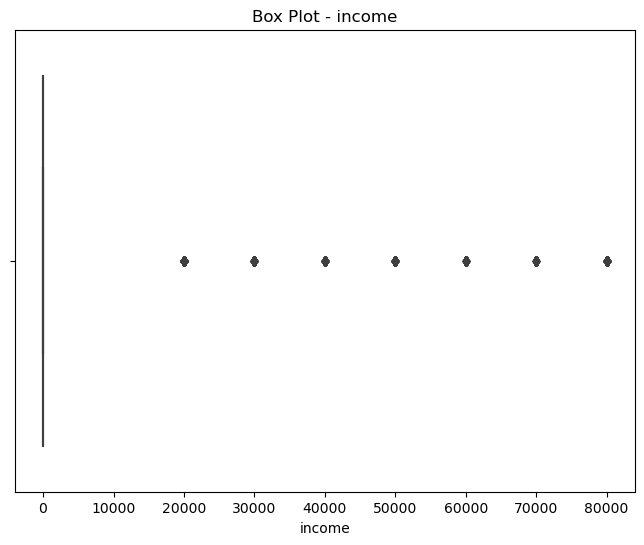

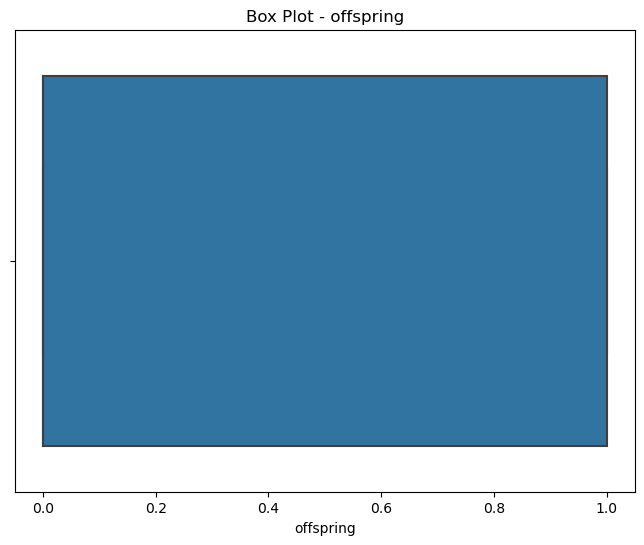

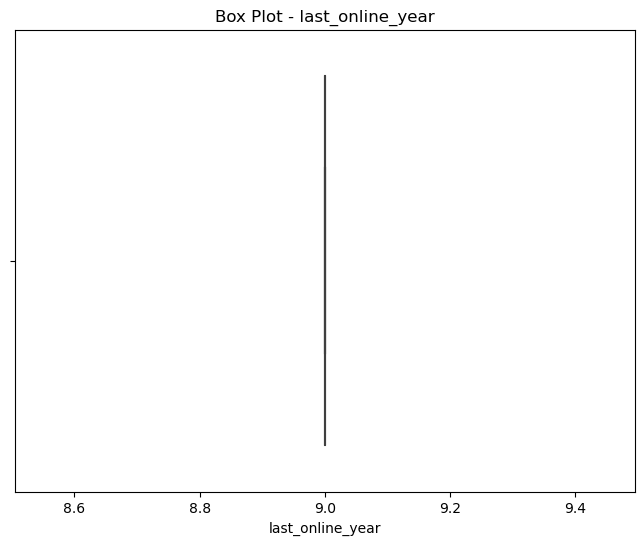

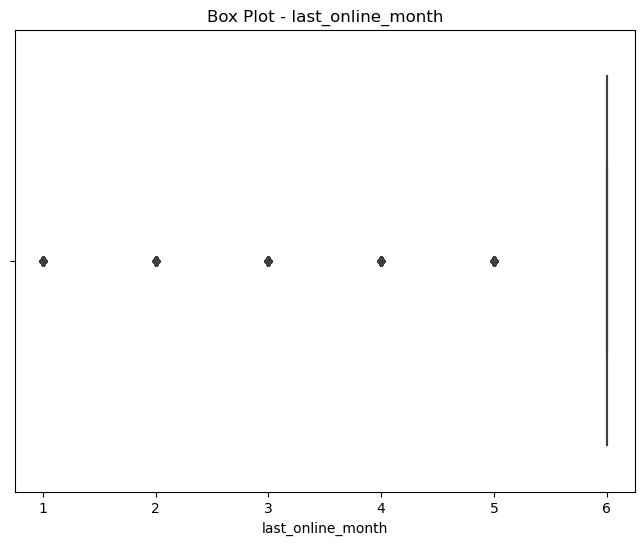

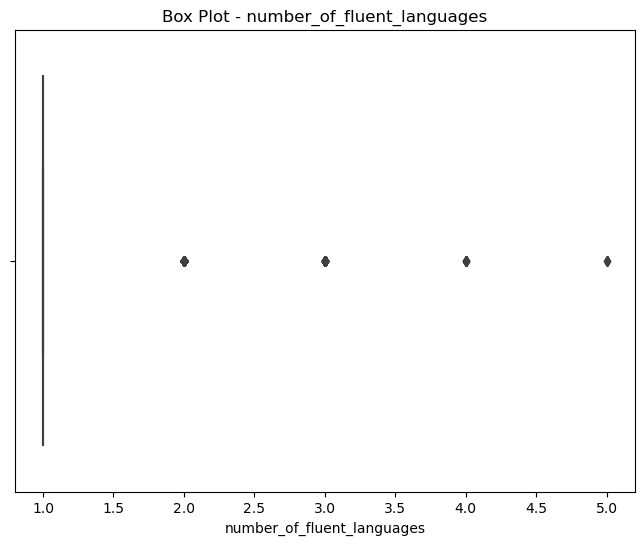

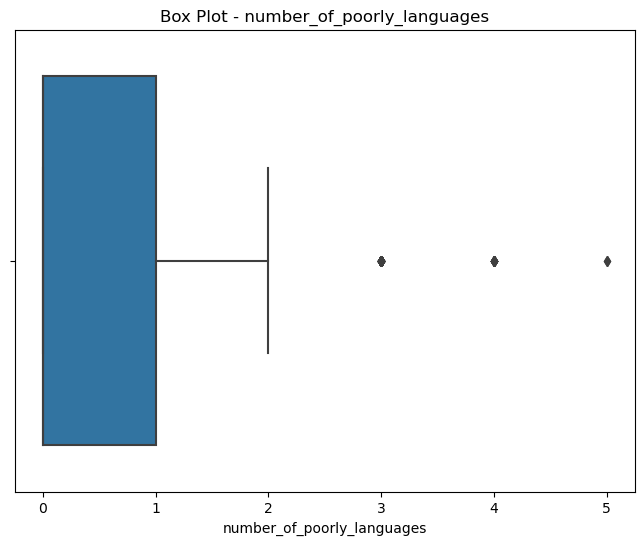

In [43]:
def visualize_outliers(df):
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]: 
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Box Plot - {column}')
            plt.show()

visualize_outliers(df)

In [44]:
df.describe()

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
count,8106.000000,8106.000000,8106.000000,8106.000000,8106.0,8106.000000,8106.000000,8106.000000
mean,31.013940,68.299531,6141.507772,0.418209,9.0,5.543918,1.144708,0.344806
std,7.877669,3.911431,17090.523382,0.493295,0.0,1.124505,0.406799,0.649706
min,18.000000,36.000000,-1.000000,0.000000,9.0,1.000000,1.000000,0.000000
25%,25.000000,66.000000,-1.000000,0.000000,9.0,6.000000,1.000000,0.000000
50%,29.000000,68.000000,-1.000000,0.000000,9.0,6.000000,1.000000,0.000000
75%,35.000000,71.000000,-1.000000,1.000000,9.0,6.000000,1.000000,1.000000
max,56.000000,95.000000,80000.000000,1.000000,9.0,6.000000,5.000000,5.000000


In [45]:
df.corr(numeric_only=True)

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
age,1.000000,-0.010446,0.046339,0.113244,NaN,0.025370,-0.015221,0.015694
height,-0.010446,1.000000,0.087517,-0.036475,NaN,-0.002963,0.010286,0.030675
income,0.046339,0.087517,1.000000,0.082650,NaN,-0.033010,-0.000976,0.013469
offspring,0.113244,-0.036475,0.082650,1.000000,NaN,0.115019,-0.013870,0.013130
last_online_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_online_month,0.025370,-0.002963,-0.033010,0.115019,NaN,1.000000,0.006469,0.023263
number_of_fluent_languages,-0.015221,0.010286,-0.000976,-0.013870,NaN,0.006469,1.000000,0.067009
number_of_poorly_languages,0.015694,0.030675,0.013469,0.013130,NaN,0.023263,0.067009,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8106 entries, 0 to 9513
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         8106 non-null   float64
 1   body_type                   8106 non-null   object 
 2   diet                        8106 non-null   object 
 3   drinks                      8106 non-null   object 
 4   drugs                       8106 non-null   object 
 5   education                   8106 non-null   object 
 6   height                      8106 non-null   float64
 7   income                      8106 non-null   float64
 8   last_online                 8106 non-null   object 
 9   location                    8106 non-null   object 
 10  offspring                   8106 non-null   int64  
 11  orientation                 8106 non-null   object 
 12  pets                        8106 non-null   object 
 13  religion                    8106 non-n

In [47]:
generation=[]
for i in df["age"].values:
    if (i>=18) and (i<=32):
        generation.append("Millennial")
    elif (i>=33) and (i<=47):
        generation.append("Gen X-er")
    elif (48>=33) and (i<=70):
        generation.append("Boomers")
    else:
        generation.append("Unkown")

df["generation"]=generation   

<Axes: xlabel='generation'>

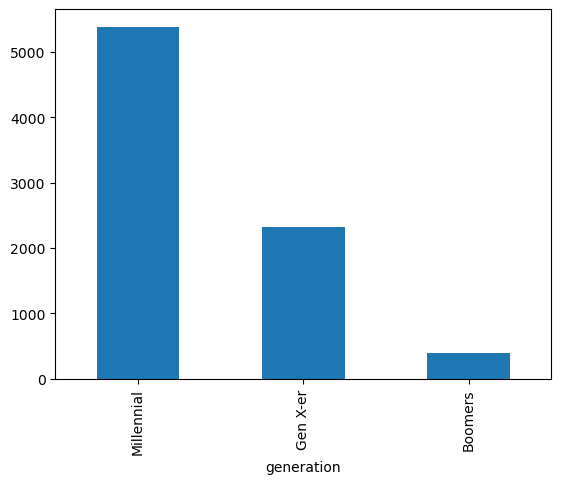

In [48]:
df["generation"].replace("Unkown","Boomers",regex=True,inplace=True)
df["generation"].value_counts().plot.bar() 

In [49]:
df1=pd.get_dummies(df,drop_first=True)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8106 entries, 0 to 9513
Columns: 5799 entries, age to generation_Millennial
dtypes: bool(5791), float64(3), int64(5)
memory usage: 45.3 MB


In [51]:
x,y=df1.drop("age",axis=1),df[["age"]]

In [52]:
df1 = df1.astype(int)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
   
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.789577,3.529363,2.929159
Gradient Boosting,0.788221,3.540709,2.941020
Ridge,0.763606,3.740827,3.068775
Linear,0.694363,4.253558,3.419634
Extra Tree,0.655770,4.514124,3.541307
Decision Tree,0.642064,4.603114,3.615290
Lasso,0.604687,4.837486,3.669950
KNeighborsRegressor,0.454950,5.680251,4.003206
ElasticNet,0.351497,6.195910,4.521039


In [54]:
generation=[]
for i in df["age"].values:
    if (i>=18) and (i<=32):
        generation.append("Millennial")
    elif (i>=33) and (i<=47):
        generation.append("Gen X-er")
    elif (48>=33) and (i<=70):
        generation.append("Boomers")
    else:
        generation.append("Unkown")

df["generation"]=generation  

In [55]:
##'Boomers' 'Gen X-er' 'Millennial'

df['generation'].replace('Boomers',0,inplace=True)
df['generation'].replace('Gen X-er',1,inplace=True)
df['generation'].replace('Millennial',2,inplace=True)

In [56]:
y=df[["generation"]]

In [57]:
df=df.drop(["generation","age"],axis=1) 

In [58]:
x=pd.get_dummies(df,drop_first=True)    

In [59]:
from  sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
#accuaracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    return best_model,max(results), confusion_matrix(model_predict,y_test)



model_classification(x,y)

Model:  GaussianNB()
Model Accuracy:  0.6620065789473685
Model Confusion Matrix:  [[   0    1    0]
 [  19   74  109]
 [  83  610 1536]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.11      0.37      0.17       202
           2       0.93      0.69      0.79      2229

    accuracy                           0.66      2432
   macro avg       0.35      0.35      0.32      2432
weighted avg       0.86      0.66      0.74      2432

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.6792763157894737
Model Confusion Matrix:  [[   0    0    0]
 [   4   22   15]
 [  98  663 1630]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      0.54      0.06        41
           2       0.99      0.68      0.81      2391

    accurac

(GradientBoostingClassifier(),
 0.6842105263157895,
 array([[   4,   12,   13],
        [  30,  197,  316],
        [  68,  476, 1316]]))